In [1]:
import numpy as np
import pandas as pd
from astropy.io import ascii
from astropy.coordinates import SkyCoord
from astropy import units as u
import os
import matplotlib.pyplot as plt
import mpl_scatter_density

# Comparing catalogue (vG+2023)

In [2]:
df_vg =  pd.read_csv('Catalogues/NGC5822_vG2023+GaiaDR3.csv')
df_vg

,Cluster,GaiaDR3,RA_ICRS,DE_ICRS,Plx,pmRA,pmDE,Gmag,BPmag,RPmag,...,E(BP-RP),b_E(BP-RP)_x,B_E(BP-RP)_xa,Lib,RAJ2000,DEJ2000,e_RAJ2000,e_DEJ2000,RADEcorJ2000,angDist
0,NGC_5822,5881692149823656320,224.731239,-54.566271,1.1099,-7.637,-5.249,14.223904,14.590719,13.684692,...,NaN,NaN,NaN,NaN,224.731298,-54.566248,0.341326,0.333229,-0.4286,0.0
1,NGC_5822,5881693146252823040,225.029198,-54.642280,1.2323,-7.615,-5.588,13.173482,13.473589,12.706505,...,0.2934,0.2906,0.2962,A,225.029257,-54.642255,0.219421,0.231904,-0.2935,0.0
2,NGC_5822,5881693008813852032,225.093020,-54.639486,1.1770,-7.513,-5.336,17.276005,18.127857,16.374056,...,0.3402,0.3291,0.3522,PHOENIX,225.093078,-54.639462,1.215334,1.216434,-0.1546,0.0
3,NGC_5822,5881621849790430720,225.256861,-54.944673,1.2361,-7.625,-4.914,10.945331,11.127864,10.621691,...,NaN,NaN,NaN,NaN,225.256920,-54.944652,0.230675,0.238101,-0.2818,0.0
4,NGC_5822,5881581129144018944,224.939856,-55.470265,1.1691,-7.361,-6.179,17.633880,18.448076,16.705523,...,0.2559,0.2192,0.2934,PHOENIX,224.939914,-55.470237,1.450671,1.829419,-0.3321,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3806,NGC_5822,5887682941959525632,225.462268,-54.661084,1.2073,-7.094,-4.968,19.999956,20.675339,18.942724,...,NaN,NaN,NaN,NaN,225.462322,-54.661062,7.778286,7.457061,0.1268,0.0
3807,NGC_5822,5887513479716081408,228.244040,-54.481390,1.2680,-7.562,-4.841,19.671330,20.907232,18.590193,...,NaN,NaN,NaN,NaN,228.244098,-54.481369,6.284833,7.602907,-0.0883,0.0
3808,NGC_5822,5887644802678111616,225.789618,-54.490146,1.2263,-7.360,-5.264,14.942392,15.364985,14.344611,...,0.0127,0.0036,0.0230,MARCS,225.789675,-54.490122,0.383133,0.494652,-0.2939,0.0
3809,NGC_5822,5887409644592719744,226.436096,-55.149314,0.8496,-7.272,-5.059,19.407978,20.748910,18.374445,...,NaN,NaN,NaN,NaN,226.436153,-55.149292,6.470691,9.169844,-0.3229,0.0


In [3]:
jj, = np.where(df_vg.Pmemb >= 0.7)
dfvg = df_vg.iloc[jj]

In [4]:
dfvg

,Cluster,GaiaDR3,RA_ICRS,DE_ICRS,Plx,pmRA,pmDE,Gmag,BPmag,RPmag,...,E(BP-RP),b_E(BP-RP)_x,B_E(BP-RP)_xa,Lib,RAJ2000,DEJ2000,e_RAJ2000,e_DEJ2000,RADEcorJ2000,angDist
0,NGC_5822,5881692149823656320,224.731239,-54.566271,1.1099,-7.637,-5.249,14.223904,14.590719,13.684692,...,NaN,NaN,NaN,NaN,224.731298,-54.566248,0.341326,0.333229,-0.4286,0.0
1,NGC_5822,5881693146252823040,225.029198,-54.642280,1.2323,-7.615,-5.588,13.173482,13.473589,12.706505,...,0.2934,0.2906,0.2962,A,225.029257,-54.642255,0.219421,0.231904,-0.2935,0.0
2,NGC_5822,5881693008813852032,225.093020,-54.639486,1.1770,-7.513,-5.336,17.276005,18.127857,16.374056,...,0.3402,0.3291,0.3522,PHOENIX,225.093078,-54.639462,1.215334,1.216434,-0.1546,0.0
3,NGC_5822,5881621849790430720,225.256861,-54.944673,1.2361,-7.625,-4.914,10.945331,11.127864,10.621691,...,NaN,NaN,NaN,NaN,225.256920,-54.944652,0.230675,0.238101,-0.2818,0.0
9,NGC_5822,5881663734314222848,224.529052,-54.907023,1.2427,-8.045,-5.691,15.783429,16.332071,15.084052,...,0.2014,0.1932,0.2110,MARCS,224.529115,-54.906998,0.564024,0.674880,-0.3561,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3788,NGC_5822,5887644076778836992,225.766634,-54.552180,1.2115,-7.631,-5.502,17.686186,18.633373,16.712296,...,0.3172,0.2954,0.3487,MARCS,225.766693,-54.552156,1.551876,1.830193,-0.2104,0.0
3790,NGC_5822,5887682907633247232,225.485704,-54.661399,1.2133,-7.699,-5.579,13.759797,14.118023,13.219545,...,NaN,NaN,NaN,NaN,225.485763,-54.661374,0.237196,0.260675,-0.1946,0.0
3792,NGC_5822,5887644802678106752,225.802585,-54.496725,1.0860,-7.484,-5.220,16.826729,17.568169,15.986682,...,0.1613,0.1489,0.1749,PHOENIX,225.802642,-54.496702,0.989988,1.443266,-0.3447,0.0
3808,NGC_5822,5887644802678111616,225.789618,-54.490146,1.2263,-7.360,-5.264,14.942392,15.364985,14.344611,...,0.0127,0.0036,0.0230,MARCS,225.789675,-54.490122,0.383133,0.494652,-0.2939,0.0


# 5 Populations

In [5]:
p1 = pd.read_csv('Catalogues/pop1_NGC5822_GMM2.csv')
p2 = pd.read_csv('Catalogues/pop2_NGC5822_GMM2.csv')
p3 = pd.read_csv('Catalogues/pop3_NGC5822_GMM2.csv')
p4 = pd.read_csv('Catalogues/pop4_NGC5822_GMM2.csv')
p5 = pd.read_csv('Catalogues/pop5_NGC5822_GMM2.csv')

## Computing Completeness and Purity

### Population 1

In [6]:
ra1 = p1.RAJ2000
dec1 = p1.DEJ2000

ra2 = dfvg.RAJ2000
dec2 = dfvg.DEJ2000

In [7]:
#Catalogue from my work with GMM
catalog1 = SkyCoord(ra=ra1, dec=dec1, unit='degree')
#Catalogue from vG+2023
catalog2 = SkyCoord(ra=ra2, dec=dec2, unit='degree')

In [8]:
idx, d2d, d3d = catalog1.match_to_catalog_sky(catalog2)

In [9]:
max_sep = 1.0 * u.arcsec  # Exemplo de separacao limite de 1 segundo de arco
matches = d2d < max_sep

# Selecionar apenas correspondências válidas
matched_idx = idx[matches]
matched_d2d = d2d[matches]

In [10]:
matched_idx_catalog1 = np.where(matches)[0]
matched_idx_catalog2 = idx[matches]

In [11]:
p1.iloc[matched_idx_catalog1]


,RAJ2000,DEJ2000,pmRA,pmDE,Gmag,BP-RP,Plx,cluster


In [12]:
dfvg.iloc[matched_idx_catalog2]

,Cluster,GaiaDR3,RA_ICRS,DE_ICRS,Plx,pmRA,pmDE,Gmag,BPmag,RPmag,...,E(BP-RP),b_E(BP-RP)_x,B_E(BP-RP)_xa,Lib,RAJ2000,DEJ2000,e_RAJ2000,e_DEJ2000,RADEcorJ2000,angDist


Text(0, 0.5, 'DEC (deg)')

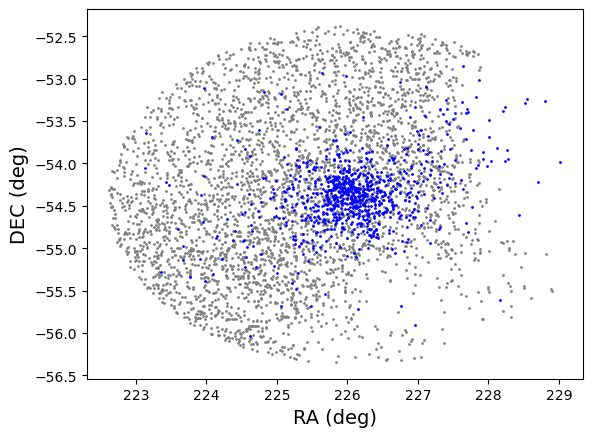

In [13]:
fig, ax = plt.subplots()

ax.scatter(p1.RAJ2000, p1.DEJ2000, s=1, c='grey')
ax.scatter(dfvg.RAJ2000, dfvg.DEJ2000, s=1, c='b')
ax.scatter(p1.iloc[matched_idx_catalog1].RAJ2000, p1.iloc[matched_idx_catalog1].DEJ2000, s=4, c='r')
ax.set_xlabel('RA (deg)', fontsize=14)
ax.set_ylabel('DEC (deg)', fontsize=14)
# ax.set_ylim(-11.5,-14.2)
# ax.set_xlim(121.2,124.5)

In [14]:
dfvg_t = len(dfvg)
p1_t = len(p1.iloc[matched_idx_catalog1])

Completeness


In [15]:
p1_c = p1_t /dfvg_t
p1_c*100

0.0

Pureness

In [16]:
p1_p = p1_t/len(p1)
p1_p*100

0.0

### Population 2

In [17]:
ra1 = p2.RAJ2000
dec1 = p2.DEJ2000

ra2 = dfvg.RAJ2000
dec2 = dfvg.DEJ2000

In [18]:
#Catalogue from my work with GMM
catalog1 = SkyCoord(ra=ra1, dec=dec1, unit='degree')
#Catalogue from vG+2023
catalog2 = SkyCoord(ra=ra2, dec=dec2, unit='degree')

In [19]:
idx, d2d, d3d = catalog1.match_to_catalog_sky(catalog2)

In [20]:
max_sep = 1.0 * u.arcsec  # Exemplo de separacao limite de 1 segundo de arco
matches = d2d < max_sep

# Selecionar apenas correspondências válidas
matched_idx = idx[matches]
matched_d2d = d2d[matches]

In [21]:
matched_idx_catalog1 = np.where(matches)[0]
matched_idx_catalog2 = idx[matches]

In [22]:
p2

,RAJ2000,DEJ2000,pmRA,pmDE,Gmag,BP-RP,Plx,cluster
0,227.336537,-56.170745,-6.473,-6.232,13.967035,0.905355,1.2236,1
1,226.859952,-56.223042,-9.122,-3.641,13.939487,0.852195,1.2154,1
2,227.136449,-56.116648,-8.346,-7.390,12.018602,0.760868,1.1876,1
3,226.955792,-55.918543,-8.914,-5.621,13.823125,0.844557,1.0897,1
4,224.760322,-56.211802,-6.325,-7.210,14.339382,1.008641,1.0678,1
...,...,...,...,...,...,...,...,...
2229,226.620421,-52.508899,-6.928,-4.019,20.803293,0.871740,1.1419,1
2230,226.626821,-52.489904,-7.314,-3.762,20.778814,0.857243,1.3402,1
2231,226.565209,-52.468862,-7.633,-4.525,19.005207,2.009749,1.1418,1
2232,226.451824,-52.500538,-8.397,-4.699,19.878792,2.183044,1.3050,1


In [23]:
p2.iloc[matched_idx_catalog1]


,RAJ2000,DEJ2000,pmRA,pmDE,Gmag,BP-RP,Plx,cluster
38,225.478249,-55.681710,-7.781,-5.683,12.982288,0.701295,1.2525,1
42,226.153458,-55.717672,-7.530,-5.365,16.106497,1.339175,1.1593,1
47,225.681429,-55.541233,-7.110,-5.223,13.714863,0.855884,1.2967,1
52,224.623584,-56.032527,-7.719,-5.169,12.289694,0.627565,1.1517,1
78,223.760734,-55.344302,-7.487,-5.748,16.466734,1.414545,1.1152,1
...,...,...,...,...,...,...,...,...
1836,225.055931,-53.182302,-7.159,-5.756,13.477468,0.814109,1.1455,1
1864,224.813362,-53.151720,-7.914,-5.132,14.380452,0.925223,1.2183,1
1949,225.981918,-52.964467,-7.827,-5.348,13.357611,0.739209,1.2670,1
2016,225.632394,-52.932365,-7.897,-5.463,17.262901,1.688242,1.1019,1


In [24]:
dfvg.iloc[matched_idx_catalog2]

,Cluster,GaiaDR3,RA_ICRS,DE_ICRS,Plx,pmRA,pmDE,Gmag,BPmag,RPmag,...,E(BP-RP),b_E(BP-RP)_x,B_E(BP-RP)_xa,Lib,RAJ2000,DEJ2000,e_RAJ2000,e_DEJ2000,RADEcorJ2000,angDist
1311,NGC_5822,5881380781843703040,225.478188,-55.681735,1.2525,-7.781,-5.683,12.982288,13.249472,12.548177,...,0.2206,0.2177,0.2233,A,225.478249,-55.681710,0.239109,0.247591,-0.2298,0.0
1284,NGC_5822,5881387207115290368,226.153399,-55.717696,1.1593,-7.530,-5.365,16.106497,16.707300,15.368125,...,0.1624,0.1545,0.1711,MARCS,226.153458,-55.717672,0.644677,0.613090,-0.1829,0.0
2064,NGC_5822,5881404043388082560,225.681373,-55.541256,1.2967,-7.110,-5.223,13.714863,14.057667,13.201783,...,0.1453,0.1421,0.1485,PHOENIX,225.681429,-55.541233,0.235066,0.276642,-0.2901,0.0
1537,NGC_5822,5881458778464898944,224.623523,-56.032550,1.1517,-7.719,-5.169,12.289694,12.524664,11.897099,...,0.3681,0.3656,0.3717,A,224.623584,-56.032527,0.186739,0.208676,-0.2841,0.0
1510,NGC_5822,5881551377958880128,223.760676,-55.344328,1.1152,-7.487,-5.748,16.466734,17.092070,15.677525,...,0.1673,0.1549,0.1773,PHOENIX,223.760734,-55.344302,0.835923,0.904408,-0.2372,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
984,NGC_5822,5899835775283387136,225.055878,-53.182328,1.1455,-7.159,-5.756,13.477468,13.800722,12.986613,...,0.1255,0.1222,0.1285,MARCS,225.055931,-53.182302,0.253235,0.347012,-0.5460,0.0
989,NGC_5822,5899845396010785920,224.813303,-53.151743,1.2183,-7.914,-5.132,14.380452,14.750266,13.825043,...,0.1429,0.1384,0.1493,MARCS,224.813362,-53.151720,0.311401,0.436078,-0.4481,0.0
3759,NGC_5822,5899886765128211200,225.981860,-52.964491,1.2670,-7.827,-5.348,13.357611,13.645534,12.906324,...,NaN,NaN,NaN,NaN,225.981918,-52.964467,0.202012,0.223100,-0.3587,0.0
3738,NGC_5822,5899936513703143680,225.632336,-52.932389,1.1019,-7.897,-5.463,17.262901,18.045506,16.357264,...,0.3311,0.3175,0.3447,MARCS,225.632394,-52.932365,1.194547,1.311843,-0.3811,0.0


Text(0, 0.5, 'DEC (deg)')

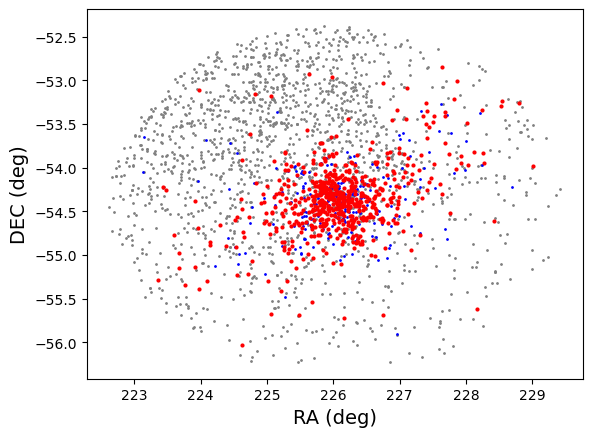

In [25]:
fig, ax = plt.subplots()

ax.scatter(p2.RAJ2000, p2.DEJ2000, s=1, c='grey')
ax.scatter(dfvg.RAJ2000, dfvg.DEJ2000, s=1, c='b')
ax.scatter(p2.iloc[matched_idx_catalog1].RAJ2000, p2.iloc[matched_idx_catalog1].DEJ2000, s=4, c='r')
ax.set_xlabel('RA (deg)', fontsize=14)
ax.set_ylabel('DEC (deg)', fontsize=14)
# ax.set_ylim(-11.5,-14.2)
# ax.set_xlim(121.2,124.5)

In [26]:
dfvg_t = len(dfvg)
p2_t = len(p2.iloc[matched_idx_catalog1])

Completeness


In [27]:
p2_c = p2_t /dfvg_t
p2_c*100

73.52941176470588

Pureness

In [28]:
p2_p = p2_t/len(p2)
p2_p*100

27.976723366159355

### Population 3

In [29]:
ra1 = p3.RAJ2000
dec1 = p3.DEJ2000

ra2 = dfvg.RAJ2000
dec2 = dfvg.DEJ2000

In [30]:
#Catalogue from my work with GMM
catalog1 = SkyCoord(ra=ra1, dec=dec1, unit='degree')
#Catalogue from vG+2023
catalog2 = SkyCoord(ra=ra2, dec=dec2, unit='degree')

In [31]:
idx, d2d, d3d = catalog1.match_to_catalog_sky(catalog2)

In [32]:
max_sep = 1.0 * u.arcsec  # Exemplo de separacao limite de 1 segundo de arco
matches = d2d < max_sep

# Selecionar apenas correspondências válidas
matched_idx = idx[matches]
matched_d2d = d2d[matches]

In [33]:
matched_idx_catalog1 = np.where(matches)[0]
matched_idx_catalog2 = idx[matches]

In [34]:
p3.iloc[matched_idx_catalog1]


,RAJ2000,DEJ2000,pmRA,pmDE,Gmag,BP-RP,Plx,cluster
827,228.235274,-53.970230,-6.924,-5.576,16.529398,1.435196,1.2016,2
868,227.527402,-54.227469,-7.139,-5.195,17.787687,1.923801,1.2754,2
891,227.309501,-54.126367,-7.004,-5.325,17.195107,1.799168,1.1054,2
898,227.365007,-54.007598,-7.090,-5.616,18.158234,2.103125,1.1848,2
961,227.824081,-54.055409,-7.391,-5.688,17.366590,1.799517,1.3043,2
985,227.980582,-54.029876,-7.320,-5.696,16.296490,1.389386,1.2952,2
1248,227.594923,-53.577140,-7.031,-5.235,16.234318,1.327342,1.1727,2
1284,227.140835,-53.679080,-7.439,-5.056,16.554722,1.476688,1.1802,2
1287,227.045925,-53.607445,-7.160,-5.557,17.452290,1.775469,1.1173,2
1300,226.987171,-53.621358,-7.340,-5.261,17.598284,1.915684,1.1047,2


In [35]:
dfvg.iloc[matched_idx_catalog2]

,Cluster,GaiaDR3,RA_ICRS,DE_ICRS,Plx,pmRA,pmDE,Gmag,BPmag,RPmag,...,E(BP-RP),b_E(BP-RP)_x,B_E(BP-RP)_xa,Lib,RAJ2000,DEJ2000,e_RAJ2000,e_DEJ2000,RADEcorJ2000,angDist
2918,NGC_5822,5887541654743766016,228.235221,-53.970255,1.2016,-6.924,-5.576,16.529398,17.192532,15.757336,...,0.1500,0.1388,0.1620,PHOENIX,228.235274,-53.970230,0.887476,0.800020,-0.2793,0.0
2739,NGC_5822,5887558658469281024,227.527347,-54.227492,1.2754,-7.139,-5.195,17.787687,18.739319,16.815517,...,0.2319,0.1900,0.3504,PHOENIX,227.527402,-54.227469,1.638738,1.864647,-0.1523,0.0
1887,NGC_5822,5887574777533795712,227.309448,-54.126391,1.1054,-7.004,-5.325,17.195107,18.072567,16.273400,...,0.3258,0.3138,0.3377,PHOENIX,227.309501,-54.126367,1.436220,1.696039,-0.3663,0.0
2105,NGC_5822,5887576525529391232,227.364953,-54.007623,1.1848,-7.090,-5.616,18.158234,19.276236,17.173111,...,0.2468,0.2335,0.2599,PHOENIX,227.365007,-54.007598,2.375200,2.306083,-0.1364,0.0
1375,NGC_5822,5887584363901458816,227.824025,-54.055434,1.3043,-7.391,-5.688,17.366590,18.257948,16.458431,...,0.3143,0.3033,0.3261,MARCS,227.824081,-54.055409,1.449495,1.580661,-0.3182,0.0
2999,NGC_5822,5887587250119993856,227.980526,-54.029901,1.2952,-7.320,-5.696,16.296490,16.913765,15.524379,...,0.1539,0.1437,0.1658,MARCS,227.980582,-54.029876,0.900304,0.906476,-0.5233,0.0
745,NGC_5822,5887800310511962112,227.594870,-53.577163,1.1727,-7.031,-5.235,16.234318,16.823107,15.495765,...,0.1696,0.1589,0.1800,MARCS,227.594923,-53.577140,0.805053,0.900257,-0.4340,0.0
2550,NGC_5822,5887806259053454592,227.140780,-53.679102,1.1802,-7.439,-5.056,16.554722,17.165634,15.688946,...,0.2361,0.2239,0.2497,MARCS,227.140835,-53.679080,0.947166,1.439487,-0.4341,0.0
2781,NGC_5822,5887807633472681728,227.045871,-53.607470,1.1173,-7.160,-5.557,17.452290,18.304909,16.529440,...,0.2367,0.2073,0.2841,PHOENIX,227.045925,-53.607445,1.258274,1.416524,-0.1747,0.0
3038,NGC_5822,5887810176093320192,226.987116,-53.621382,1.1047,-7.340,-5.261,17.598284,18.546879,16.631195,...,0.3940,0.3806,0.4081,MARCS,226.987171,-53.621358,1.399471,1.477153,-0.2042,0.0


Text(0, 0.5, 'DEC (deg)')

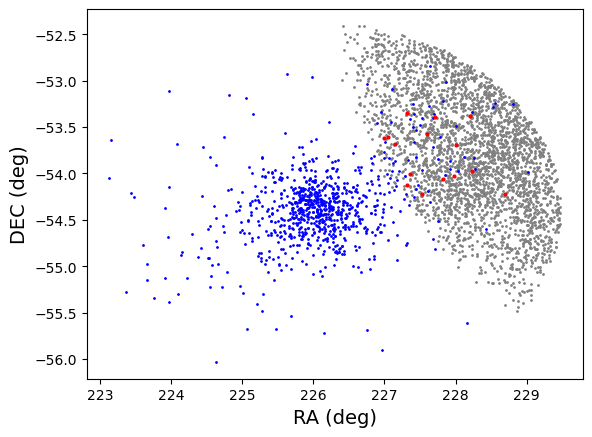

In [36]:
fig, ax = plt.subplots()

ax.scatter(p3.RAJ2000, p3.DEJ2000, s=1, c='grey')
ax.scatter(dfvg.RAJ2000, dfvg.DEJ2000, s=1, c='b')
ax.scatter(p3.iloc[matched_idx_catalog1].RAJ2000, p3.iloc[matched_idx_catalog1].DEJ2000, s=4, c='r')
ax.set_xlabel('RA (deg)', fontsize=14)
ax.set_ylabel('DEC (deg)', fontsize=14)
# ax.set_ylim(-11.5,-14.2)
# ax.set_xlim(121.2,124.5)

In [37]:
dfvg_t = len(dfvg)
p3_t = len(p3.iloc[matched_idx_catalog1])

Completeness


In [38]:
p3_c = p3_t /dfvg_t
p3_c*100

1.7647058823529411

Pureness

In [39]:
p3_p = p3_t/len(p3)
p3_p*100

0.5064145847400405

### Population 4

In [40]:
ra1 = p4.RAJ2000
dec1 = p4.DEJ2000

ra2 = dfvg.RAJ2000
dec2 = dfvg.DEJ2000

In [41]:
#Catalogue from my work with GMM
catalog1 = SkyCoord(ra=ra1, dec=dec1, unit='degree')
#Catalogue from vG+2023
catalog2 = SkyCoord(ra=ra2, dec=dec2, unit='degree')

In [42]:
idx, d2d, d3d = catalog1.match_to_catalog_sky(catalog2)

In [43]:
max_sep = 1.0 * u.arcsec  # Exemplo de separacao limite de 1 segundo de arco
matches = d2d < max_sep

# Selecionar apenas correspondências válidas
matched_idx = idx[matches]
matched_d2d = d2d[matches]

In [44]:
matched_idx_catalog1 = np.where(matches)[0]
matched_idx_catalog2 = idx[matches]

In [45]:
p4.iloc[matched_idx_catalog1]


,RAJ2000,DEJ2000,pmRA,pmDE,Gmag,BP-RP,Plx,cluster


In [46]:
dfvg.iloc[matched_idx_catalog2]

,Cluster,GaiaDR3,RA_ICRS,DE_ICRS,Plx,pmRA,pmDE,Gmag,BPmag,RPmag,...,E(BP-RP),b_E(BP-RP)_x,B_E(BP-RP)_xa,Lib,RAJ2000,DEJ2000,e_RAJ2000,e_DEJ2000,RADEcorJ2000,angDist


Text(0, 0.5, 'DEC (deg)')

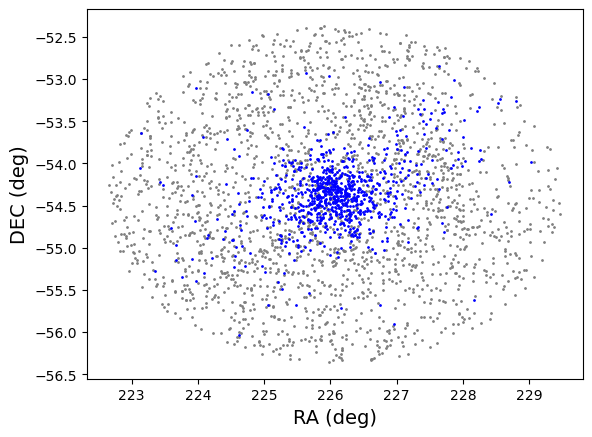

In [47]:
fig, ax = plt.subplots()

ax.scatter(p4.RAJ2000, p4.DEJ2000, s=1, c='grey')
ax.scatter(dfvg.RA_ICRS, dfvg.DE_ICRS, s=1, c='b')
ax.scatter(p4.iloc[matched_idx_catalog1].RAJ2000, p4.iloc[matched_idx_catalog1].DEJ2000, s=4, c='r')
ax.set_xlabel('RA (deg)', fontsize=14)
ax.set_ylabel('DEC (deg)', fontsize=14)
# ax.set_ylim(-11.5,-14.2)
# ax.set_xlim(121.2,124.5)

In [48]:
dfvg_t = len(dfvg)
p4_t = len(p4.iloc[matched_idx_catalog1])

Completeness


In [49]:
p4_c = p4_t /dfvg_t
p4_c*100

0.0

Pureness

In [50]:
p4_p = p4_t/len(p4)
p4_p*100

0.0

### Population 5

In [51]:
ra1 = p5.RAJ2000
dec1 = p5.DEJ2000

ra2 = dfvg.RAJ2000
dec2 = dfvg.DEJ2000

In [52]:
#Catalogue from my work with GMM
catalog1 = SkyCoord(ra=ra1, dec=dec1, unit='degree')
#Catalogue from vG+2023
catalog2 = SkyCoord(ra=ra2, dec=dec2, unit='degree')

In [53]:
idx, d2d, d3d = catalog1.match_to_catalog_sky(catalog2)

In [54]:
max_sep = 1.0 * u.arcsec  # Exemplo de separacao limite de 1 segundo de arco
matches = d2d < max_sep

# Selecionar apenas correspondências válidas
matched_idx = idx[matches]
matched_d2d = d2d[matches]

In [55]:
matched_idx_catalog1 = np.where(matches)[0]
matched_idx_catalog2 = idx[matches]

In [56]:
p5.iloc[matched_idx_catalog1]


,RAJ2000,DEJ2000,pmRA,pmDE,Gmag,BP-RP,Plx,cluster
49,226.964840,-55.900078,-7.280,-5.884,16.938236,1.629484,1.1518,4
714,225.270886,-55.485639,-7.798,-5.539,17.944447,1.924454,1.0986,4
798,224.961534,-55.213613,-7.512,-5.034,17.349474,1.875168,1.2689,4
882,225.516540,-54.972653,-7.405,-5.551,17.753492,1.922346,1.1047,4
902,225.550404,-54.816960,-7.640,-6.049,17.376156,1.977882,1.1493,4
...,...,...,...,...,...,...,...,...
3200,223.146034,-53.643513,-7.268,-5.721,15.736899,1.373733,1.2879,4
3263,225.411168,-53.996448,-7.802,-5.409,17.514515,1.835011,1.3037,4
3264,225.422485,-53.983847,-7.714,-5.433,17.478111,1.840128,1.2477,4
3266,225.140891,-54.001061,-7.554,-5.575,17.246780,1.771187,1.2710,4


In [57]:
dfvg.iloc[matched_idx_catalog2]

,Cluster,GaiaDR3,RA_ICRS,DE_ICRS,Plx,pmRA,pmDE,Gmag,BPmag,RPmag,...,E(BP-RP),b_E(BP-RP)_x,B_E(BP-RP)_xa,Lib,RAJ2000,DEJ2000,e_RAJ2000,e_DEJ2000,RADEcorJ2000,angDist
3810,NGC_5822,5880575114680639488,226.964782,-55.900104,1.1518,-7.280,-5.884,16.938236,17.682375,16.052890,...,0.5231,0.5039,0.5512,PHOENIX,226.964840,-55.900078,1.178003,1.315606,-0.4344,0.0
438,NGC_5822,5881572848446940544,225.270825,-55.485664,1.0986,-7.798,-5.539,17.944447,18.905075,16.980621,...,0.3596,0.3357,0.3836,PHOENIX,225.270886,-55.485639,1.771798,1.910727,-0.1220,0.0
1017,NGC_5822,5881594602515882240,224.961476,-55.213635,1.2689,-7.512,-5.034,17.349474,18.231016,16.355848,...,0.3260,0.3056,0.3428,PHOENIX,224.961534,-55.213613,1.452612,1.774935,-0.2587,0.0
76,NGC_5822,5881623735215581440,225.516483,-54.972678,1.1047,-7.405,-5.551,17.753492,18.541800,16.619453,...,0.4619,0.4450,0.4884,MARCS,225.516540,-54.972653,1.674362,1.671096,-0.1196,0.0
1236,NGC_5822,5881629301493616512,225.550345,-54.816987,1.1493,-7.640,-6.049,17.376156,18.338808,16.360926,...,0.4227,0.4125,0.4347,MARCS,225.550404,-54.816960,1.440665,1.377784,-0.1632,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516,NGC_5822,5893979982494313088,223.145979,-53.643539,1.2879,-7.268,-5.721,15.736899,16.360847,14.987114,...,0.2038,0.1887,0.2141,MARCS,223.146034,-53.643513,0.474725,0.582420,-0.2913,0.0
475,NGC_5822,5899727056734045056,225.411109,-53.996472,1.3037,-7.802,-5.409,17.514515,18.410551,16.575540,...,0.1878,0.1728,0.2000,PHOENIX,225.411168,-53.996448,1.360443,1.869730,-0.3028,0.0
484,NGC_5822,5899727095425562624,225.422426,-53.983871,1.2477,-7.714,-5.433,17.478111,18.408281,16.568153,...,0.3394,0.3214,0.3532,PHOENIX,225.422485,-53.983847,1.358540,1.848568,-0.3000,0.0
187,NGC_5822,5899728950851484416,225.140834,-54.001086,1.2710,-7.554,-5.575,17.246780,18.115307,16.344120,...,0.2961,0.2849,0.3067,MARCS,225.140891,-54.001061,1.091629,1.218040,-0.2247,0.0


Text(0, 0.5, 'DEC (deg)')

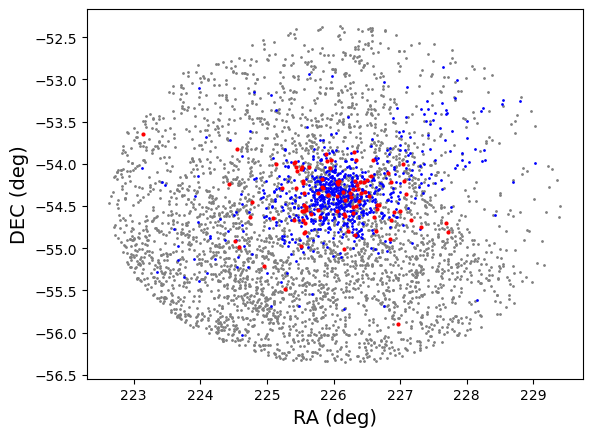

In [58]:
fig, ax = plt.subplots()

ax.scatter(p5.RAJ2000, p5.DEJ2000, s=1, c='grey')
ax.scatter(dfvg.RAJ2000, dfvg.DEJ2000, s=1, c='b')
ax.scatter(p5.iloc[matched_idx_catalog1].RAJ2000, p5.iloc[matched_idx_catalog1].DEJ2000, s=4, c='r')
ax.set_xlabel('RA (deg)', fontsize=14)
ax.set_ylabel('DEC (deg)', fontsize=14)
# ax.set_ylim(-11.5,-14.2)
# ax.set_xlim(121.2,124.5)

In [59]:
dfvg_t = len(dfvg)
p5_t = len(p5.iloc[matched_idx_catalog1])

Completeness


In [60]:
p5_c = p5_t /dfvg_t
p5_c*100

11.529411764705882

Pureness

In [61]:
p5_p = p5_t/len(p5)
p5_p*100

2.6623200217332244

## Analyzing

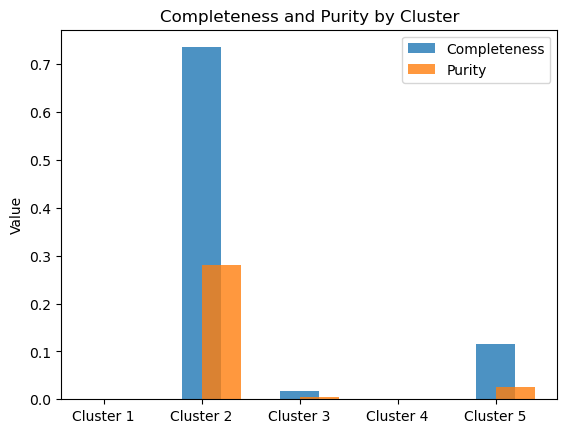

In [62]:
import seaborn as sns

# Dados simulados: completude e pureza por cluster
clusters = [1, 2, 3, 4, 5]
completeness = [p1_c, p2_c, p3_c, p4_c, p5_c]  # Exemplo de completude
purity = [p1_p, p2_p, p3_p, p4_p, p5_p]  # Exemplo de pureza

# Bar plot
x = range(len(clusters))
plt.bar(x, completeness, width=0.4, label="Completeness", alpha=0.8, align='center')
plt.bar(x, purity, width=0.4, label="Purity", alpha=0.8, align='edge')

plt.xticks(x, [f"Cluster {c}" for c in clusters])
plt.ylabel("Value")
plt.title("Completeness and Purity by Cluster")
plt.legend()
plt.show()